Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
 2) Change the minimum length in apriori algorithm
 3) Visulize the obtained rules using different plots 

In [1]:
pip install mlxtend

## Import necessary lib

In [44]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

###  Import dataset

In [2]:
book_data = pd.read_csv('book.csv')
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


### Data exploration

In [3]:
print('types of books',book_data.columns)

types of books Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')


In [4]:
book_data.shape

(2000, 11)

In [5]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
book_data['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

In [7]:
book_data['YouthBks'].value_counts()

0    1505
1     495
Name: YouthBks, dtype: int64

In [8]:
book_data['CookBks'].value_counts()

0    1138
1     862
Name: CookBks, dtype: int64

In [9]:
book_data['DoItYBks'].value_counts()

0    1436
1     564
Name: DoItYBks, dtype: int64

In [10]:
book_data['RefBks'].value_counts()

0    1571
1     429
Name: RefBks, dtype: int64

In [11]:
book_data['ArtBks'].value_counts()

0    1518
1     482
Name: ArtBks, dtype: int64

In [12]:
book_data['GeogBks'].value_counts()

0    1448
1     552
Name: GeogBks, dtype: int64

In [13]:
book_data['ItalCook'].value_counts()

0    1773
1     227
Name: ItalCook, dtype: int64

In [14]:
book_data['ItalAtlas'].value_counts()

0    1926
1      74
Name: ItalAtlas, dtype: int64

In [15]:
book_data['ItalArt'].value_counts()

0    1903
1      97
Name: ItalArt, dtype: int64

In [16]:
book_data['Florence'].value_counts()

0    1783
1     217
Name: Florence, dtype: int64

###  Apriori Algorithm

In [18]:
book_appri1 = apriori(book_data,min_support=0.1,use_colnames=True)
book_appri1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


<AxesSubplot:xlabel='support', ylabel='itemsets'>

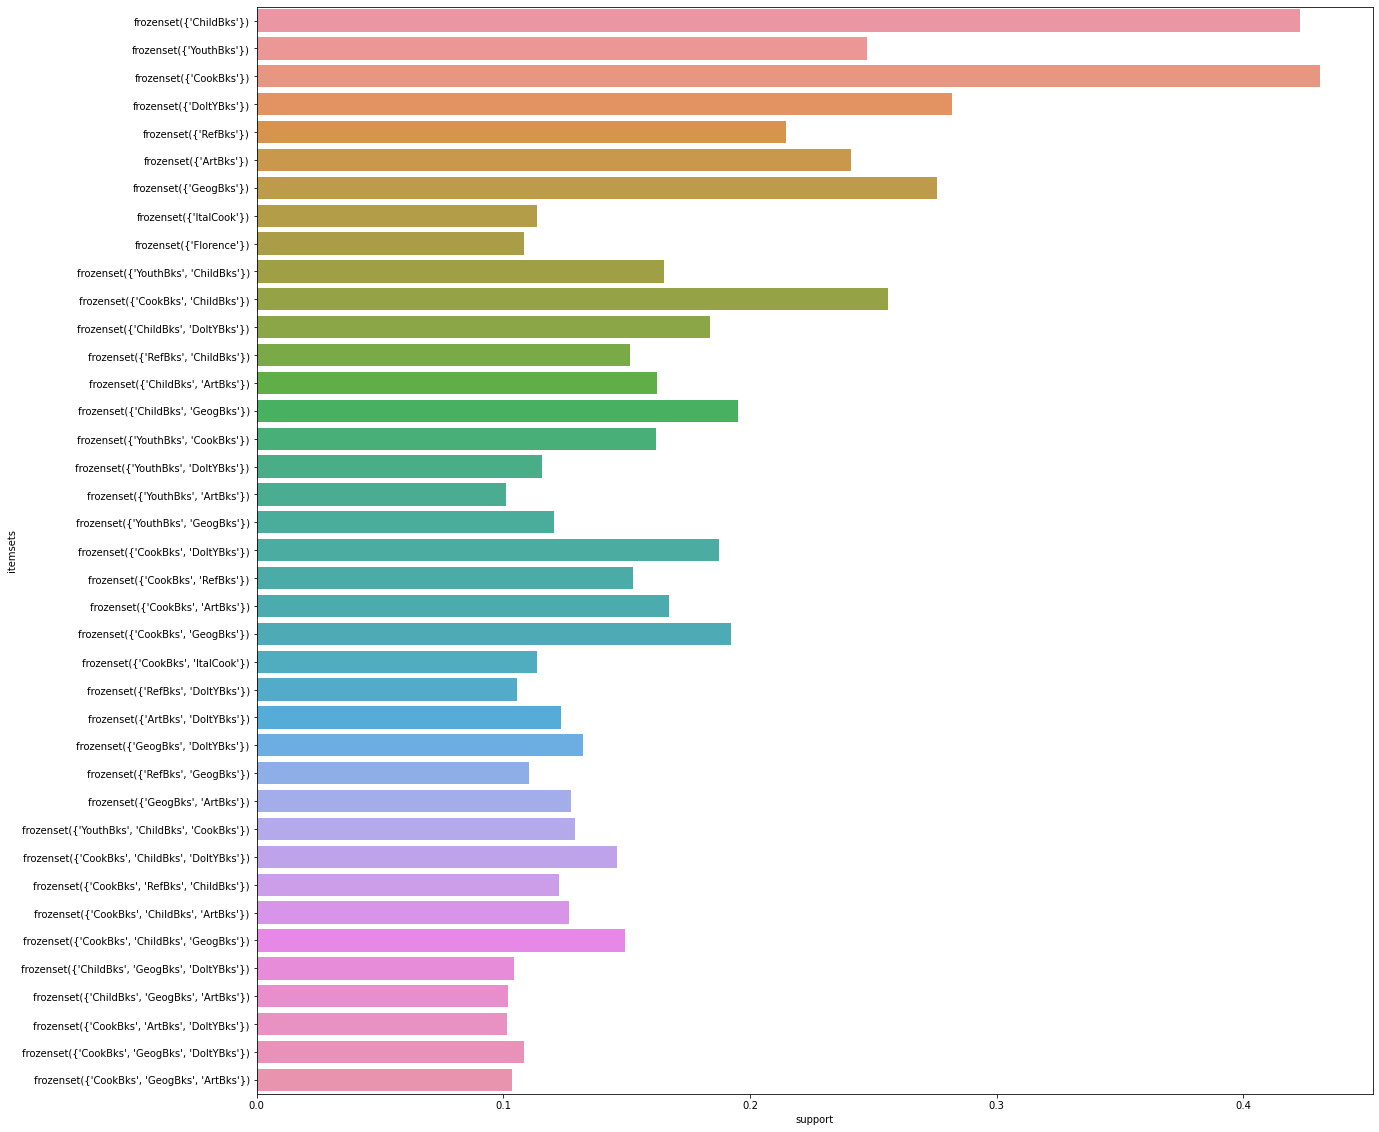

In [49]:
plt.figure(figsize = (20,20))
sns.barplot(y='itemsets',x='support',data=book_appri1)

In [29]:
book_appri1.dtypes

support     float64
itemsets     object
dtype: object

In [19]:
book_appri2 = apriori(book_data,min_support=0.2,use_colnames=True)
book_appri2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


<AxesSubplot:xlabel='support', ylabel='itemsets'>

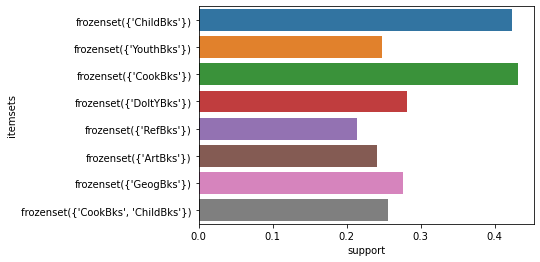

In [52]:
sns.barplot(y='itemsets',x='support',data=book_appri2)

In [20]:
book_appri3 = apriori(book_data,min_support=0.3,use_colnames=True)
book_appri3

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


<AxesSubplot:xlabel='support', ylabel='itemsets'>

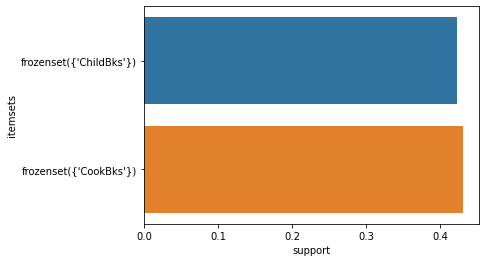

In [53]:
sns.barplot(y='itemsets',x='support',data=book_appri3)

In [22]:
book_asso1 = association_rules(df= book_appri1,metric='confidence',min_threshold=0.8)
book_asso1.sort_values(by = 'support',ascending = False,inplace=True)
book_asso1
# here we take as min_threshold value 0.8 for confidence matricso that 
# we can get a confidence value of items greater than 0.8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159


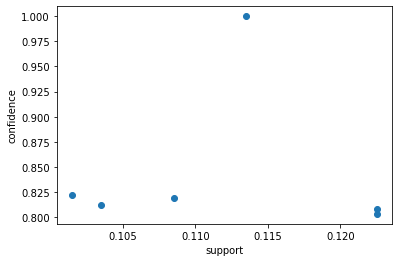

In [42]:
plt.scatter(data = book_asso1,x = 'support',y = 'confidence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [23]:
book_asso2 = association_rules(df= book_appri1,metric='confidence',min_threshold=0.08)
book_asso2.sort_values(by = 'support',ascending = False,inplace=True)
book_asso2
# here we take as min_threshold value 0.08 for confidence matric so that 
# we can get a confidence value of items greater than 0.08

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
26,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
82,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
17,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375


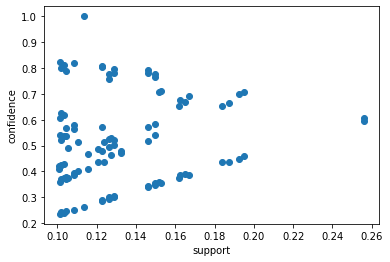

In [43]:
plt.scatter(data = book_asso2,x = 'support',y = 'confidence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [38]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [28]:
book_asso3 = association_rules(df= book_appri1,metric='confidence',min_threshold=0.7)
book_asso3.sort_values(by = 'support',ascending = False,inplace=True)
book_asso3
# here we take as min_threshold value 0.7 for confidence matric so that 
# we can get a confidence value of items greater than 0.7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
13,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571
12,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081
6,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
4,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
11,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403


In [32]:
book_asso4 = association_rules(df= book_appri1,metric='lift',min_threshold=0.7)
book_asso4.sort_values(by = 'support',ascending = False,inplace=True)
book_asso4
# here we take as min_threshold value 0.7 for lift matricso that 
# we can get a confidence value of items greater than 0.7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
26,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
82,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
17,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375


In [39]:
book_asso4[book_asso4.lift>1]
# here we take lift value which consist grater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
26,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
82,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
17,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375


In [37]:
book_asso5 = association_rules(df= book_appri2,metric='confidence',min_threshold=0.07)
book_asso5.sort_values(by = 'support',ascending = False,inplace=True)
book_asso5
# here we take as min_threshold value 0.07 for confidence matric so that 
# we can get a confidence value of items greater than 0.07

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [54]:
## In apriory we need to take a  min_support value 0.1 so that we can take max product
# for appriori min_support value 0.2 we can get product which consist the support grater than 0.2
#  for appriori min_support value 0.3 we can get product which consist the support grater than 0.3 

In [55]:
# we need to choose a parameter which give us maximum items of maximum support and confidence value